# Creación de la simulación con salida de 20% de la frontera derecha

Hacemos uso de los parámetros que existen en Config/parameters/vaciado_off20, y de la función que crea las condiciones iniciales utils.create_ics.create_ics_txt.

In [4]:
from utils.create_ics import create_ics_txt
from pathlib import Path

PROJECT_ROOT = Path("/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH")

BOUNDARY_FILE = "vaciado_off20/vaciado_off20_boundary.json"
FLUID_FILE = "vaciado_off20/vaciado_off20_fluid.json"

OUTPUT_NAME = "vaciado20_40x40_tree/vaciado20_est40x40.txt"
OUTPUT_LOG = "vaciado20_40x40_tree/vaciado20_est40x40.log"

create_ics_txt(BOUNDARY_FILE, FLUID_FILE, OUTPUT_NAME, OUTPUT_LOG, PROJECT_ROOT)

[INFO] Ejecutando main.py con los siguientes parámetros:
  • Script principal:        /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/InitialConditions/main.py
  • Archivo de frontera:     /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/vaciado_off20/vaciado_off20_boundary.json
  • Archivo de fluido:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/parameters/vaciado_off20/vaciado_off20_fluid.json
  • Carpeta de salida:       /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond
  • Nombre archivo salida:   vaciado20_40x40_tree/vaciado20_est40x40.txt
  • Nombre archivo resumen:  vaciado20_40x40_tree/vaciado20_est40x40.log

[✓] Ejecución completada correctamente.
Archivo generado: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/vaciado20_40x40_tree/vaciado20_est40x40.txt



0

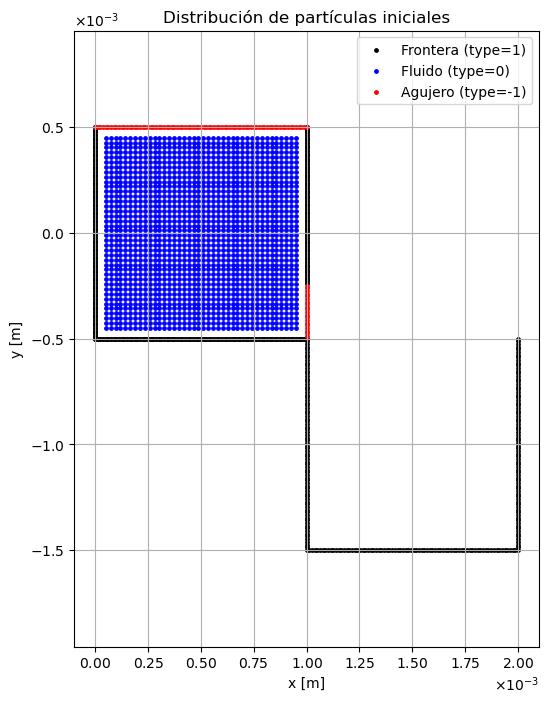

In [5]:
from utils.plot_ics import plot_ics

ics_vaciado_20 = f"{PROJECT_ROOT}/Output/init_cond/vaciado20_40x40_tree/vaciado20_est40x40.txt"

plot_ics(ics_vaciado_20)

Hacemos inicialmente el proceso de estabilización para determinar hasta que punto es necesario dejar estabilizar la densidad para la malla de 50x50, dejamos hasta los 4000 pasos que se habían calculado para la malla de 40x40.

In [6]:
from utils.create_simJSON import create_simulation_config

create_simulation_config(
    experiment_name="vaciado20_est40x40_tree",
    input_file="Output/init_cond/vaciado20_40x40_tree/vaciado20_est40x40.txt",
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 4000,
    neighbor_method="quadtree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/vaciado20_est40x40_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/params.json')

In [4]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "vaciado20_est40x40_tree",
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=10000
)


🚀 Ejecutando simulación: vaciado20_est40x40_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2379 pos: (0.00095, 0.00045)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2380 partículas desde el archivo Output/init_cond/vaciado20_est40x40.txt

[particleSummary] Número total de partículas: 2380
Fluido: 1600, Ancho: 0.0009, Altura: 0.0009
Frontera: 780, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tests/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos (Quadtree)...
Total partículas: 23

La simulación tuvo que hacerse de 40x40, 50x50 generaba una violación de segmento, en este caso duró 194.5 s que corresponde a aproximadamente 3.2 minutos.

In [7]:
from utils.create_gnuplot import generar_script_gnuplot

BASE_PLOT = f"{PROJECT_ROOT}/Output/vaciado20_est40x40_tree/Output/state_0000.txt"

generar_script_gnuplot(BASE_PLOT,
                       lim=3999,
                       retardo=0.001,
                       nombre_salida="vaciado_est40x40_tree.gp")


✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/vaciado_est40x40_tree.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–220 (221 partículas)
  Tipo -1: líneas 221–321 (101 partículas)
  Tipo 1: líneas 322–779 (458 partículas)
  Tipo 0: líneas 780–2379 (1600 partículas)


In [8]:
import subprocess

ruta_script = f"{PROJECT_ROOT}/Output/vaciado20_est40x40_tree/vaciado_est40x40_tree.gp"

result = subprocess.run(
    ["gnuplot", ruta_script],
    capture_output=True,
    text=True,
    check=True
)

Generamos las nuevas condiciones iniciales al eliminar la frontera, pero inicialmente, es necesario ver como aparece el stata_3999.txt que será el que vamos a usar como posteriores condiciones iniciales para la caida.

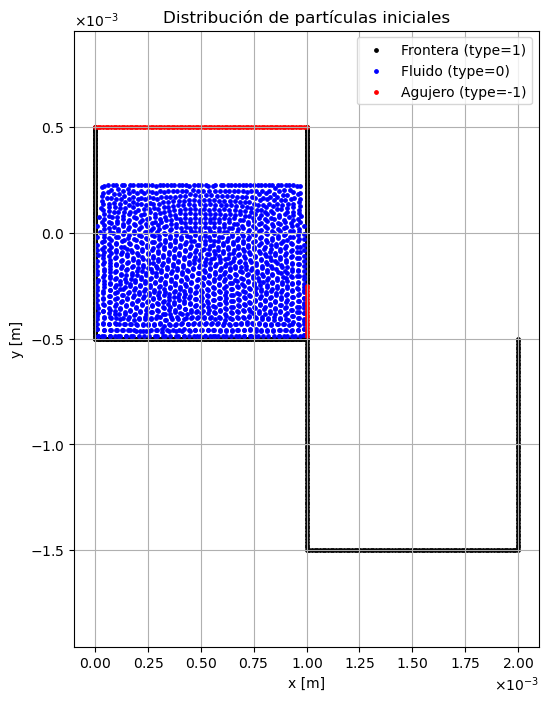

In [9]:
new_ics_20_40 = f"{PROJECT_ROOT}/Output/vaciado20_est40x40_tree/Output/state_3999.txt"

plot_ics(new_ics_20_40)

In [11]:
from utils.create_ics import clean_walls_ics

INIT_CONDS_20_40X40 = "Output/init_cond/vaciado20_40x40_tree"

clean_walls_ics(ruta_ics=new_ics_20_40,
                nombre_salida="open_new_ics_20_40.txt",
                project_root=PROJECT_ROOT,
                subcarpeta_salida=INIT_CONDS_20_40X40)

Leyendo archivo ICS: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/vaciado20_est40x40_tree/Output/state_3999.txt
Partículas originales: 2380
Partículas eliminadas (type == -1): 101
Partículas restantes: 2279
✔ Verificación OK: no quedan partículas de tipo -1
💾 Guardando archivo limpio en: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/vaciado20_40x40_tree/open_new_ics_20_40.txt


/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Config/utils/create_ics.py:103: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(str(ruta_ics), delim_whitespace=True)


🎉 Archivo ICS limpio generado correctamente.


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/init_cond/vaciado20_40x40_tree/open_new_ics_20_40.txt')

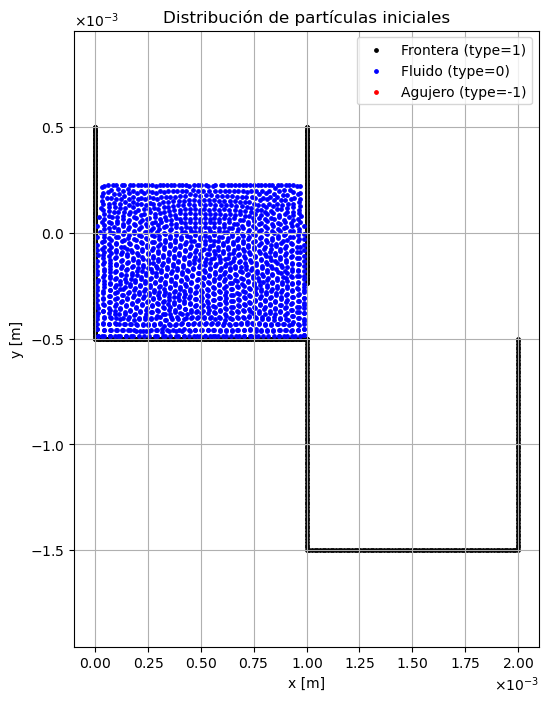

In [13]:
open_new_ics_20_40x40 = f"{PROJECT_ROOT}/{INIT_CONDS_20_40X40}/open_new_ics_20_40.txt"

plot_ics(open_new_ics_20_40x40)

In [16]:
create_simulation_config(
    experiment_name="caida20_est40x40_tree",
    input_file=f"{INIT_CONDS_20_40X40}/open_new_ics_20_40.txt",
    base_json="AndresSimParams.json",
    B = 0.48,
    c = 0.001,
    steps = 10000,
    neighbor_method="quadtree",
    project_root=PROJECT_ROOT
)

✅ Archivo generado: Output/caida20_est40x40_tree/params.json


PosixPath('/media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/caida20_est40x40_tree/params.json')

In [17]:
from utils.run_sim import run_single_simulation

run_single_simulation(
    experiment_dir=PROJECT_ROOT / "Output" / "caida20_est40x40_tree",
    sim_executable=PROJECT_ROOT / "simulacion",
    timeout_seconds=5000
)


🚀 Ejecutando simulación: caida20_est40x40_tree

[INFO] Leyendo parámetros desde: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/caida20_est40x40_tree/params.json
[INFO] Configurada EoS Monaghan con parámetros:
       B=0.48, c=0.001, rho0=1000, gamma=7
Dentro de función de lectura de partículas
Separación dx/dy de frontera: 0, 0
Separación dx/dy de fluido: 0, 0
Primera partícula de frontera:
  ID: 0 pos: (0, 0.0005)
  tipo: Frontera
 h: 2.75e-05
Última partícula de fluido:
  ID: 2379 pos: (0.000902148, 0.000226935)
  tipo: Fluido
 h: 2.75e-05
Se leyeron 2279 partículas desde el archivo Output/init_cond/vaciado20_40x40_tree/open_new_ics_20_40.txt

[particleSummary] Número total de partículas: 2279
Fluido: 1600, Ancho: 0.000978517, Altura: 0.000717397
Frontera: 679, Ancho: 0.002, Altura: 0.002
[INFO] Ejecutando test del kernel...
Prueba del kernel completada.
Resultados guardados en: Output/tests/kernel_test.output
[findNeighborsQuadTree] Buscando vecinos

Usando Fuerza bruta se habían ejecutado 12000 pasos demorando 2342.2 segundo, si hubieran sido 10000 pasos serían 1952 segunsdos, pero usando el quadtree fueron solo 493 segundos, lo que corresponde a un 25.26% del tiempo original

In [18]:
BASE_PLOT = f"{PROJECT_ROOT}/Output/caida20_est40x40_tree/Output/state_0000.txt"

generar_script_gnuplot(BASE_PLOT,
                       lim=9999,
                       retardo=0.001,
                       nombre_salida="caida_est40x40_tree.gp")

✅ Script Gnuplot generado correctamente: /media/hvarkaed/a2e590e8-6eb4-4da7-a766-06b1247531ca/NeighboorsFloodSPH/Output/caida20_est40x40_tree/caida_est40x40_tree.gp
📊 Rangos consecutivos detectados por tipo:
  Tipo 1: líneas 0–678 (679 partículas)
  Tipo 0: líneas 679–2278 (1600 partículas)


La simulación muestra un buen funcionamiento visual a pesar de que una o dos partículas salieron disparadas debido al choque inicial, hay que determinar si es necesario eliminar las partículas que salgan por fuera de la caja. También se vió un comportamiento poco natural al final una especie de goteo en un hueco más grande del fluido lo no sucede en la realidad, hay que mirar que tanto se puede aumentar el número de partículas modificando el NCRIT y sin modificarlo.